<a href="https://colab.research.google.com/github/Kubania/House-Prices-Prediction/blob/master/Moringa_Core_Week_7_IP_Mercy_Kubania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company House Sales Prediction

Hass Consulting Company is a Real Estate Company that wants to find what Factors affect the Housing Prices and Predict the for future House Sales

## 1. Defining the Question

### a) Specifying the Question



1. Study the Factors that affect housing prices for  Hass Consulting Company

2. Create a Model that Predicts the House Sales Prices





### b) Defining the Metric for Success

> The Metric of Success is by Identifying the appropriate Predictors in order to answer our Research Questions


### c) Understanding the context


> The Research is based on Real Estate, specifically for Hass Consulting Company 

### d) Recording the Experimental Design


> The EDA method shall be used to Understand Data, Prepare and Model

## 2. Reading the Data

In [0]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)


In [0]:
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
housing.head()

## 3. Checking the Data

In [0]:
housing.head()

In [0]:
housing.shape

In [671]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   condition      21610 non-null  int64  
 8   grade          21610 non-null  int64  
 9   sqft_above     21610 non-null  int64  
 10  yr_built       21610 non-null  int64  
 11  zipcode        21610 non-null  int64  
 12  lat            21610 non-null  float64
 13  long           21610 non-null  float64
 14  sqft_living15  21610 non-null  int64  
 15  sqft_lot15     21610 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.8 MB


## 5. Tidying the Dataset

In [0]:
# Identifying the Missing Data
#
housing.isnull().sum()

In [0]:
#Fill the Null values with median
for col in housing.columns[pd.isnull(housing).any()]:
  housinf[col] = housing[col].fillna(housing[col].median())

In [0]:
# Check for null
housing.isnull().any()

In [0]:
# Drop Duplicates
housing.duplicated().any()

In [0]:
housing.drop_duplicates(inplace=True)

housing.shape

In [0]:
# Checking for Anomalies

#Drop columns with only a single value

for col in housing.columns:
    if housing[col].nunique() == 1:
        housing = housing.drop(col, axis=1)
housing.shape

In [0]:
# Check number of zeros in each column
(housing == 0).sum()

In [398]:
# Drop columns with more than 10000 zeros as values
for col in housing.columns:
  if (housing[col] == 0).sum() > 10000:
    housing.drop([col], 1, inplace=True) 
    
housing.shape

(21610, 16)

**Conclusion** : The Original Data had **21613 records** and         **20 columns** but after removing duplicates and columns whose majority of its values are zeros were Dropped the we were left with    **21610 records** and **16 columns**

In [0]:
# Import the clean Dataset
housing.to_csv("housing_new.csv")

## 6. Exploratory Analysis

In [681]:
# Load clean Dataset
data = pd.read_csv('housing_new.csv')

data.drop(['id','Unnamed: 0'], 1, inplace=True)
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  sqft_above  yr_built  zipcode      lat     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00         1180      5650     1.0          3      7        1180      1955    98178  47.5112 -122.257           1340        5650
1  538000.0         3       2.25         2570      7242     2.0          3      7        2170      1951    98125  47.7210 -122.319           1690        7639
2  180000.0         2       1.00          770     10000     1.0          3      6         770      1933    98028  47.7379 -122.233           2720        8062
3  604000.0         4       3.00         1960      5000     1.0          5      7        1050      1965    98136  47.5208 -122.393           1360        5000
4  510000.0         3       2.00         1680      8080     1.0          3      8        1680      1987    98074  47.6168 -122.045           1800        7503

### **Univarite Analysis**

**Description**

No Categorical Variables In Our Data

In [682]:
#Description of the numeric data

des = data.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(data.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

price      bedrooms     bathrooms   sqft_living      sqft_lot        floors     condition         grade    sqft_above      yr_built       zipcode           lat          long  sqft_living15     sqft_lot15
count  2.161000e+04  21610.000000  21610.000000  21610.000000  2.161000e+04  21610.000000  21610.000000  21610.000000  21610.000000  21610.000000  21610.000000  21610.000000  21610.000000   21610.000000   21610.000000
mean   5.401789e+05      3.370847      2.114739   2079.881212  1.510829e+04      1.494239      3.409440      7.656779   1788.347894   1971.003609  98077.945673     47.560049   -122.213910    1986.518695   12769.031976
std    3.673876e+05      0.930110      0.770204    918.500299  4.142323e+04      0.539994      0.650764      1.175500    828.138723     29.372639     53.505373      0.138572      0.140833     685.425781   27305.972464
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02      1.000000      1.000000      1.000000    290.000000   1900.000000  98001.000000     47.155900   -122.519000     399.000000     651.000000
25%    3.216125e+05      3.000000      1.750000   1425.500000  5.040000e+03      1.000000      3.000000      7.000000   1190.000000   1951.000000  98033.000000     47.470925   -122.328000    1490.000000    5100.000000
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.619000e+03      1.500000      3.000000      7.000000   1560.000000   1975.000000  98065.000000     47.571800   -122.231000    1840.000000    7620.000000
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068875e+04      2.000000      4.000000      8.000000   2210.000000   1997.000000  98118.000000     47.678000   -122.125000    2360.000000   10083.000000
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06      3.500000      5.000000     13.000000   9410.000000   2015.000000  98199.000000     47.777600   -121.315000    6210.000000  871200.000000
Range  7.625000e+06     33.000000      8.000000  13250.000000  1.650839e+06      2.500000      4.000000     12.000000   9120.000000    115.000000    198.000000      0.621700      1.204000    5811.000000  870549.000000
IQR    3.233875e+05      1.000000      0.750000   1124.500000  5.648750e+03      1.000000      1.000000      1.000000   1020.000000     46.000000     85.000000      0.207075      0.203000     870.000000    4983.000000
skew   4.021467e+00      1.974244      0.511164      1.471532  1.305917e+01      0.616523      1.032789      0.771297      1.446758     -0.469823      0.405533     -0.485185      0.885312       1.108290       9.506129
kurt   3.451744e+01     49.060108      1.279637      5.242223  2.850406e+02     -0.484246      0.525688      1.191090      3.402008     -0.657207     -0.853604     -0.676601      1.049829       1.597009     150.743275

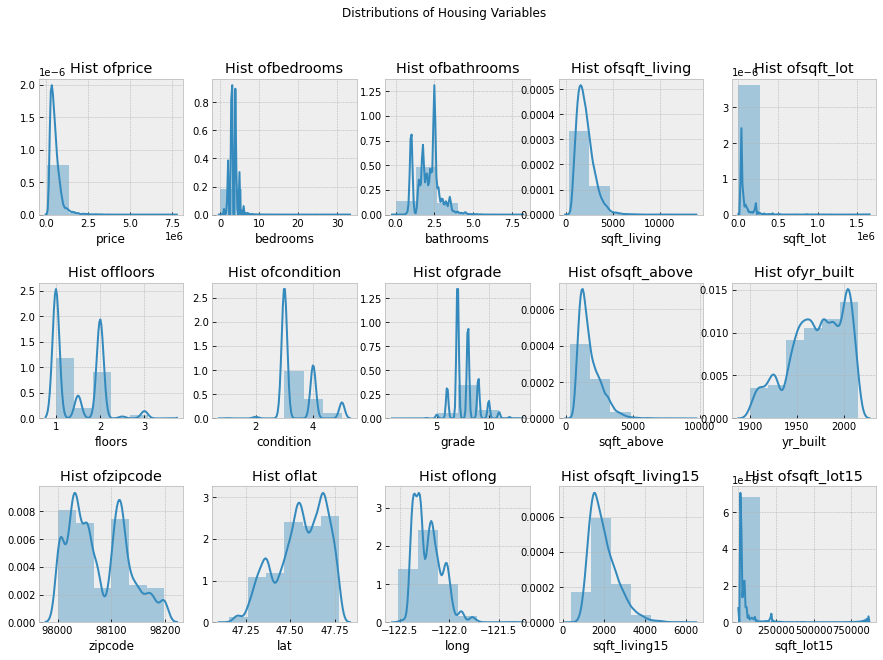

In [701]:

fig, axes = plt.subplots(nrows=3, ncols=5)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Housing Variables')

for ax, values, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(data.values.T[1]))//2)
    ax.set(title="Hist of {}".format(name), xlabel=name)

### **Bivariate Analysis**

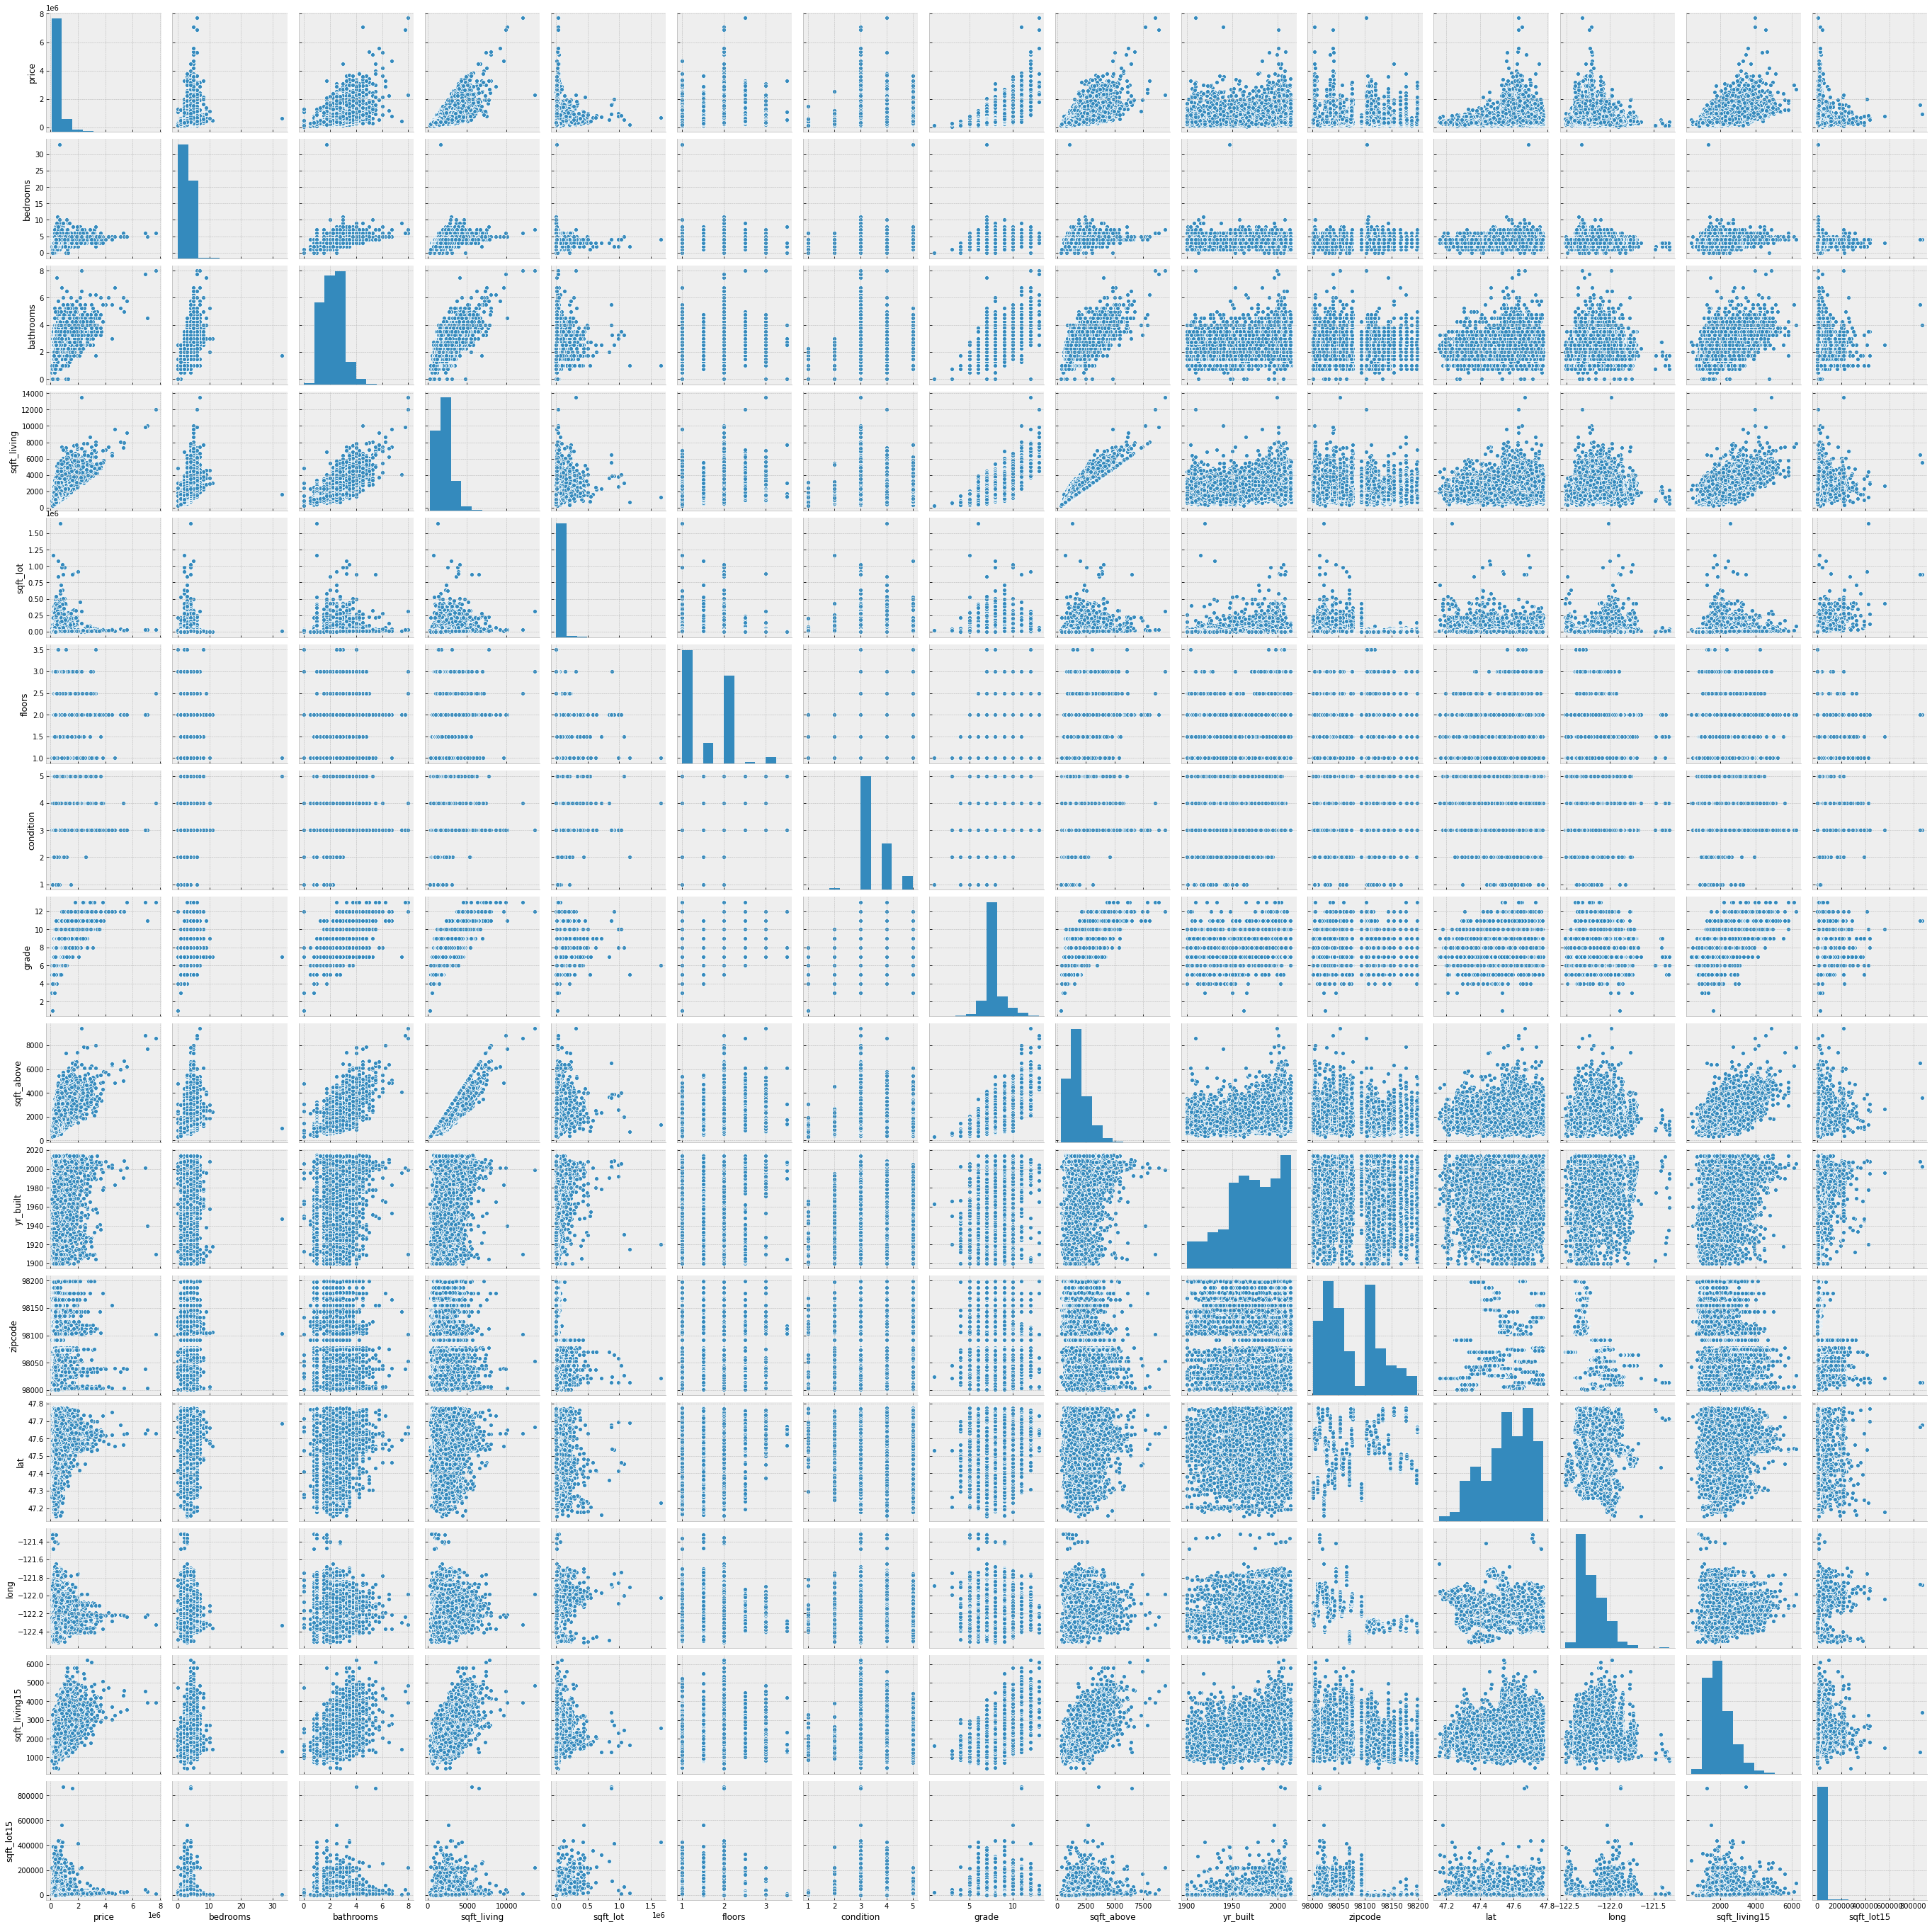

In [403]:
# Scatter Plot of all the Data Points
sns.pairplot(data)

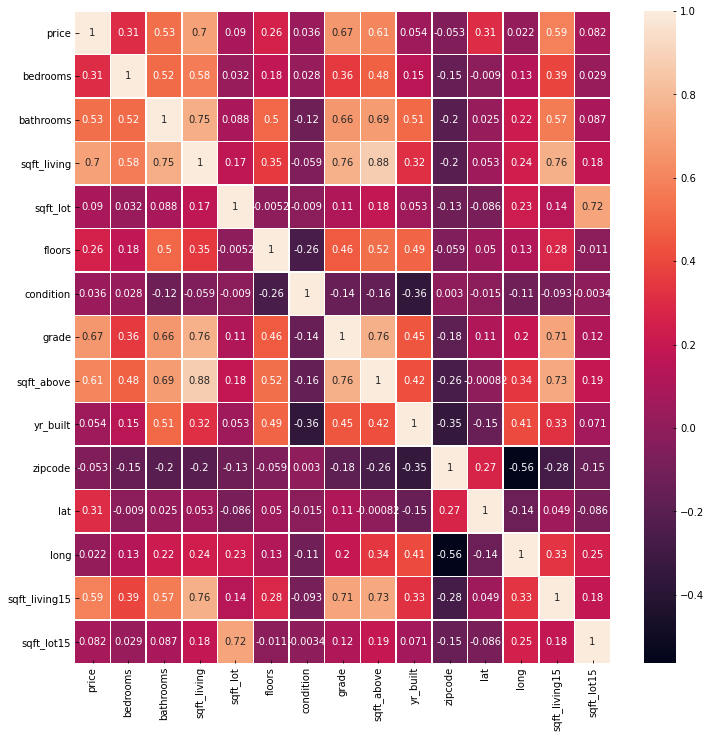

In [404]:
# A heatmap to show correlation

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

**Conclusion**

We can see from our Univariate Analysis that our data has skewness in most of its columns.

**Price**, our Target Column has Correlation with the other Variables with 8 out of 15 of the columns
It has Linear Relationship with 13 out of 15 columns


## 7. Implementing the Solution

In [0]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error


## Studying the Factors that affect Housing Prices

### Quantile Regression

                                     | bedrooms |

Mean squared error: 349478.25
Variance score: 0.10


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:18   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
x             8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04

~~~~~~~~~~~~~~~~~~~~~~~~~~

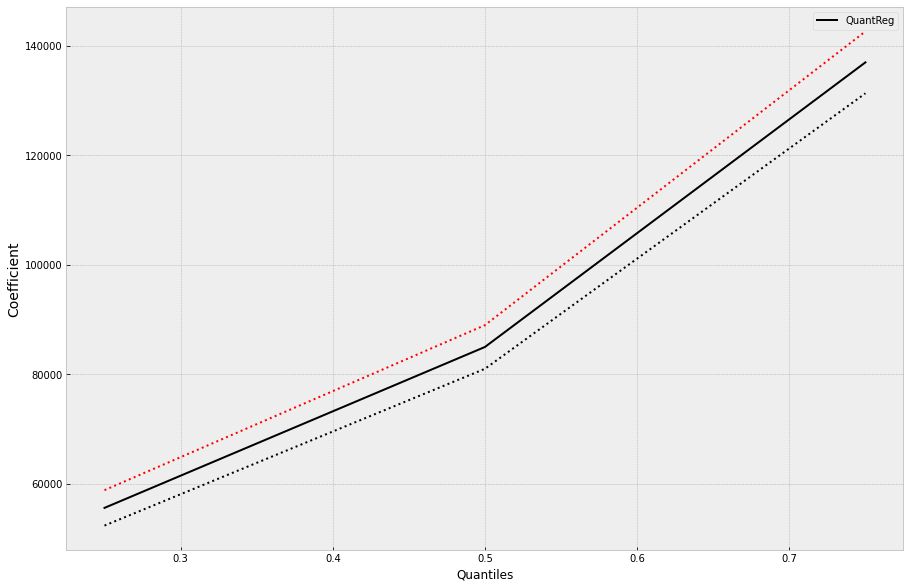

                                     | bathrooms |

Mean squared error: 312645.44
Variance score: 0.28


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1242
Model:                       QuantReg   Bandwidth:                   3.612e+04
Method:                 Least Squares   Sparsity:                    5.181e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:20   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.14e+05   5149.497     22.138      0.000    1.04e+05    1.24e+05
x            1.73e+05   2288.031     75.611      0.000    1.69e+05    1.77e+05

~~~~~~~~~~~~~~~~~~~~~~~~~

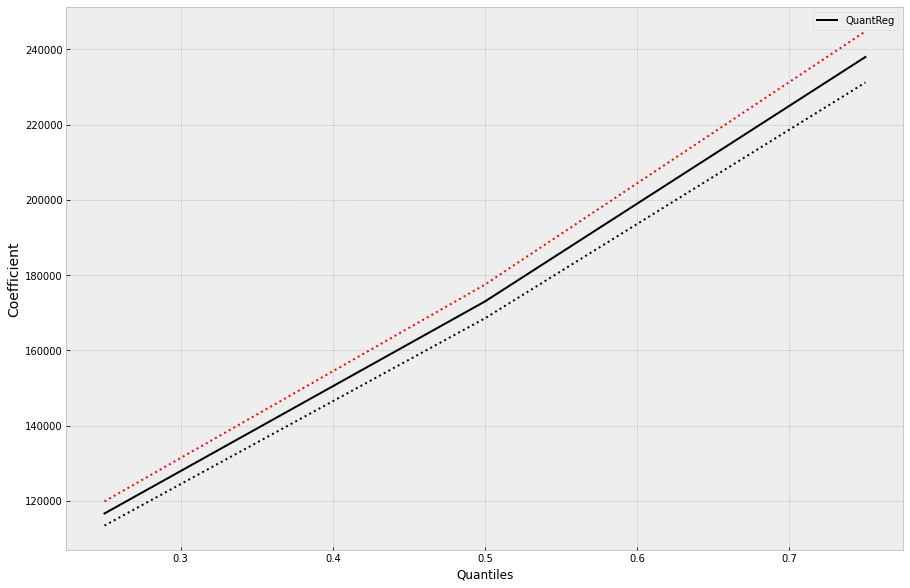

                                     | sqft_living |

Mean squared error: 261622.30
Variance score: 0.49


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2479
Model:                       QuantReg   Bandwidth:                   3.151e+04
Method:                 Least Squares   Sparsity:                    4.835e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:21   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.27e+04   4071.040     12.944      0.000    4.47e+04    6.07e+04
x            216.7401      1.791    121.048      0.000     213.231     220.250

The condition number is

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:187: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept      x_coef       ci_lb       ci_ub
0      0.25  30432.624116  165.248227  162.939971  167.556483
1      0.50  52696.035240  216.740088  213.230524  220.249652
2      0.75  87978.720799  265.957447  261.157352  270.757543 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



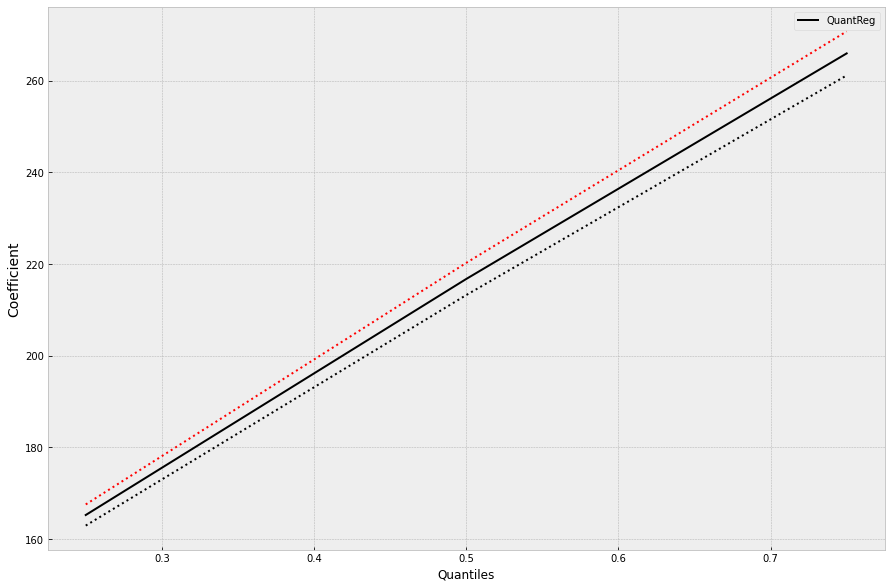

                                     | sqft_lot |

Mean squared error: 365899.52
Variance score: 0.01




/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.005469
Model:                       QuantReg   Bandwidth:                   4.179e+04
Method:                 Least Squares   Sparsity:                    5.546e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:24   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.371e+05   2007.906    217.686      0.000    4.33e+05    4.41e+05
x              0.7234      0.046     15.884      0.000       0.634       0.813

The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems. 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept    x_coef     ci_lb     ci_ub
0      0.25  315333.335735  0.532540  0.453061  0.612019
1      0.50  437092.911431  0.723368  0.634108  0.812629
2      0.75  448282.355084  1.532957  1.458666  1.607248 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



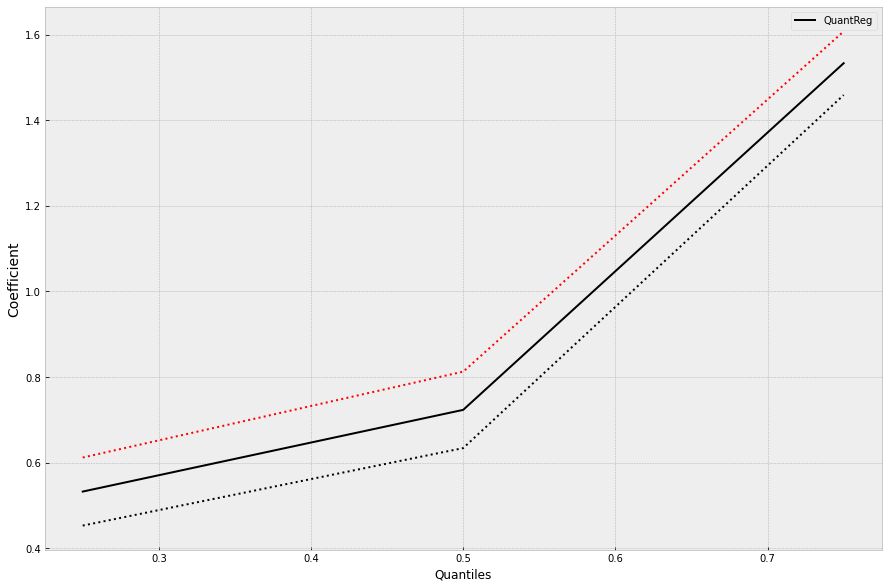

                                     | grade |

Mean squared error: 273561.16
Variance score: 0.45


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2526
Model:                       QuantReg   Bandwidth:                   3.075e+04
Method:                 Least Squares   Sparsity:                    4.226e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:28   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.96e+05   9473.130    -73.471      0.000   -7.15e+05   -6.77e+05
x           1.552e+05   1222.894    126.885      0.000    1.53e+05    1.58e+05

~~~~~~~~~~~~~~~~~~~~~~~~~~~| 

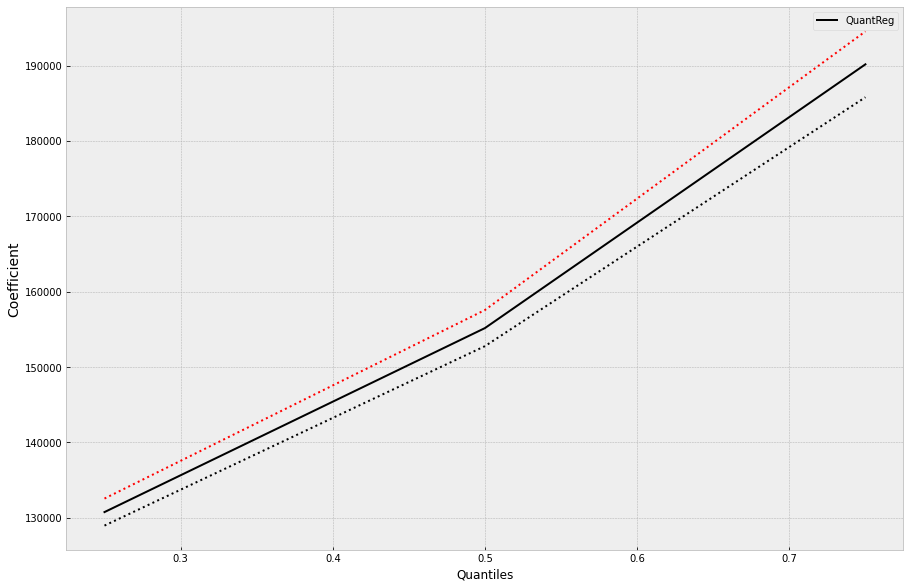

                                     | sqft_above |

Mean squared error: 292357.72
Variance score: 0.37


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1771
Model:                       QuantReg   Bandwidth:                   3.429e+04
Method:                 Least Squares   Sparsity:                    4.664e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:29   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.337e+05   3775.118     35.406      0.000    1.26e+05    1.41e+05
x            199.2032      1.916    103.993      0.000     195.449     202.958

The condition number is 

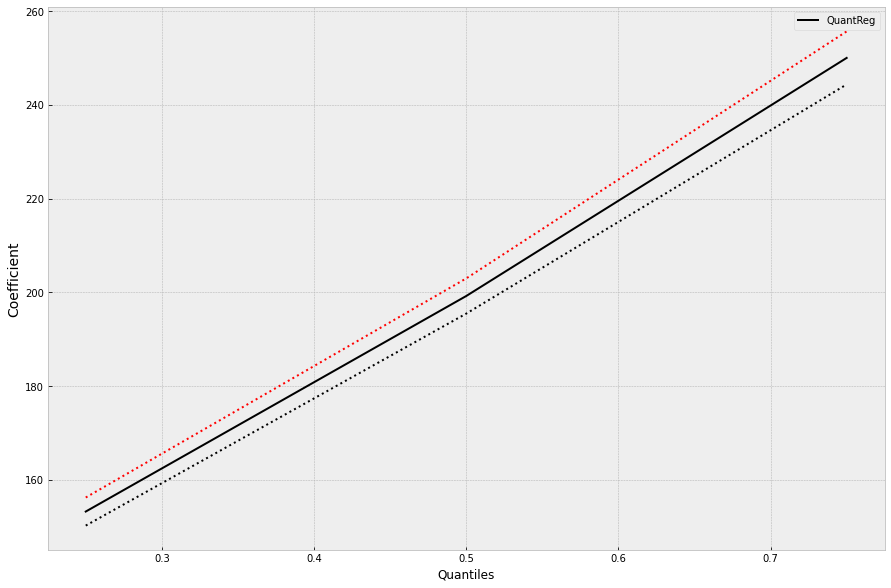

                                     | yr_built |

Mean squared error: 366843.45
Variance score: 0.00


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:            0.0005198
Model:                       QuantReg   Bandwidth:                   4.219e+04
Method:                 Least Squares   Sparsity:                    5.694e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:30   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.135e+04    1.3e+05     -0.626      0.531   -3.36e+05    1.73e+05
x            270.2703     65.937      4.099      0.000     141.028     399.512

The condition number is la

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept      x_coef       ci_lb       ci_ub
0      0.25 -1.016675e+06  677.499997  592.232601  762.767392
1      0.50 -8.135135e+04  270.270270  141.028115  399.512425
2      0.75 -2.522727e+05  454.545431  219.511779  689.579084 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



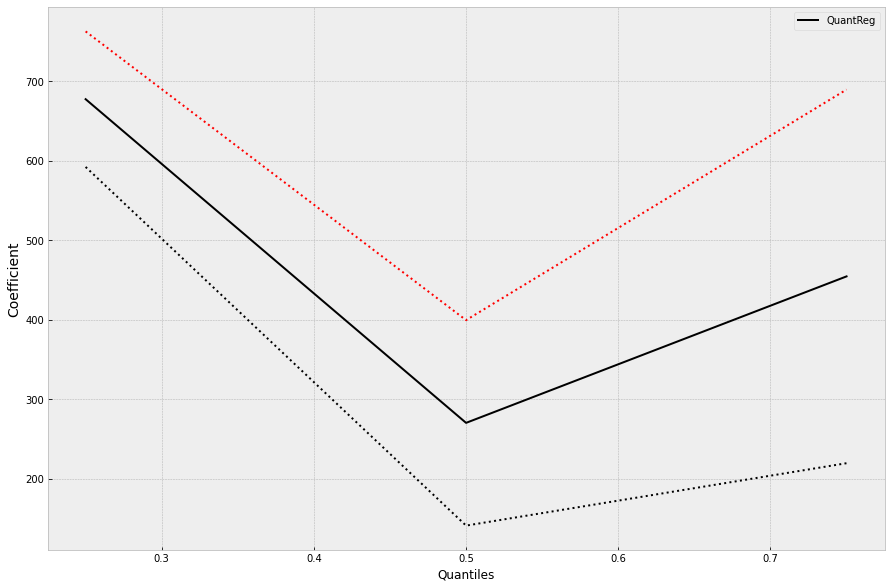

                                     | lat |

Mean squared error: 349647.44
Variance score: 0.09




/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1015
Model:                       QuantReg   Bandwidth:                   3.426e+04
Method:                 Least Squares   Sparsity:                    4.361e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:34   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.278e+07   5.09e+05    -64.388      0.000   -3.38e+07   -3.18e+07
x           6.988e+05   1.07e+04     65.285      0.000    6.78e+05     7.2e+05

The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems. 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept        x_coef         ci_lb         ci_ub
0      0.25 -2.248307e+07  4.800420e+05  4.638390e+05  4.962450e+05
1      0.50 -3.277747e+07  6.987847e+05  6.778049e+05  7.197646e+05
2      0.75 -4.931533e+07  1.050039e+06  1.017900e+06  1.082178e+06 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



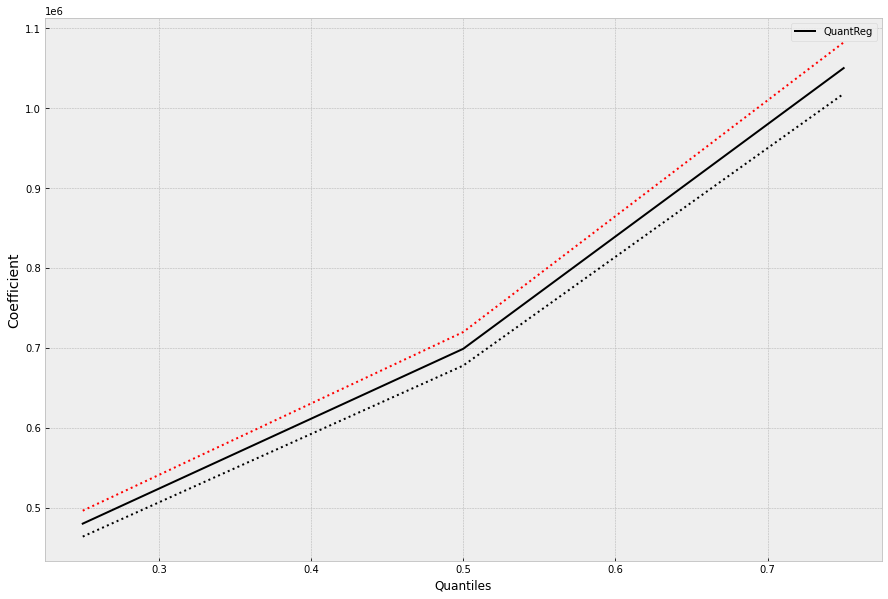

                                     | long |

Mean squared error: 367293.63
Variance score: 0.00




/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.002001
Model:                       QuantReg   Bandwidth:                   4.195e+04
Method:                 Least Squares   Sparsity:                    5.665e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:38   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.379e+07   1.67e+06      8.246      0.000    1.05e+07    1.71e+07
x           1.091e+05   1.37e+04      7.975      0.000    8.23e+04    1.36e+05

The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems. 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile     intercept         x_coef         ci_lb          ci_ub
0      0.25  8.945611e+06   70563.919149  50404.239527   90723.598771
1      0.50  1.378887e+07  109126.986013  82307.302868  135946.669157
2      0.75  1.777567e+07  140187.006035  97576.489714  182797.522356 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



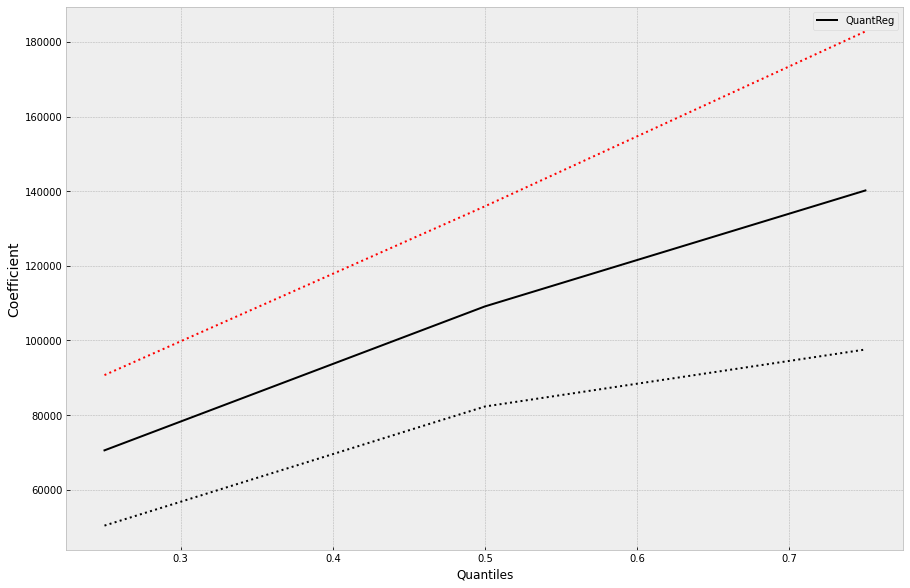

                                     | sqft_living15 |

Mean squared error: 297855.32
Variance score: 0.34


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1981
Model:                       QuantReg   Bandwidth:                   3.218e+04
Method:                 Least Squares   Sparsity:                    4.715e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:42   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.058e+04   4917.275      2.151      0.031     938.701    2.02e+04
x            240.3846      2.340    102.730      0.000     235.798     244.971

The condition number 

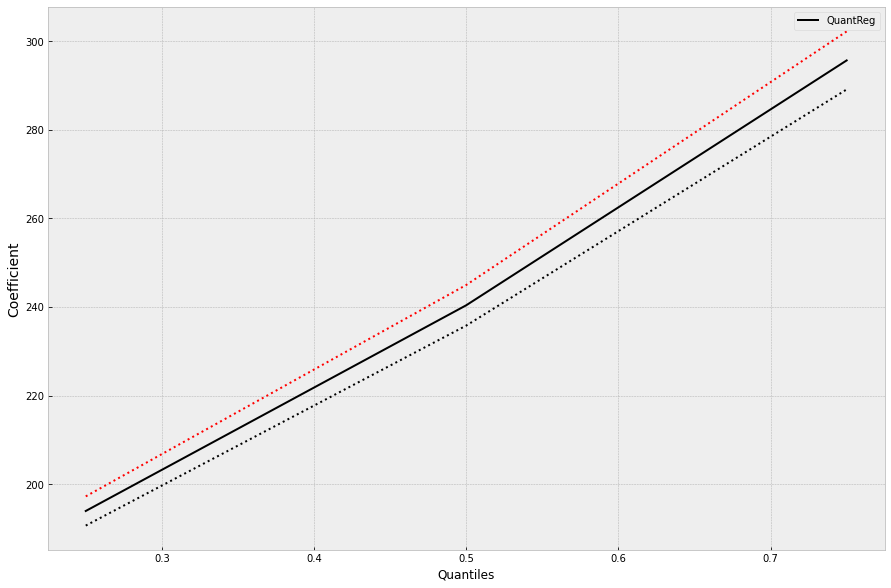

                                     | sqft_lot15 |

Mean squared error: 366128.01
Variance score: 0.01


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.004291
Model:                       QuantReg   Bandwidth:                   4.184e+04
Method:                 Least Squares   Sparsity:                    5.636e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        16:37:44   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.408e+05   2116.378    208.292      0.000    4.37e+05    4.45e+05
x              0.8709      0.070     12.405      0.000       0.733       1.009

The condition number is 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~

   quantile      intercept    x_coef     ci_lb     ci_ub
0      0.25  317643.839434  0.711449  0.604845  0.818053
1      0.50  440825.602843  0.870936  0.733319  1.008553
2      0.75  626309.195736  1.339110  1.148784  1.529436 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                               -------------------                             



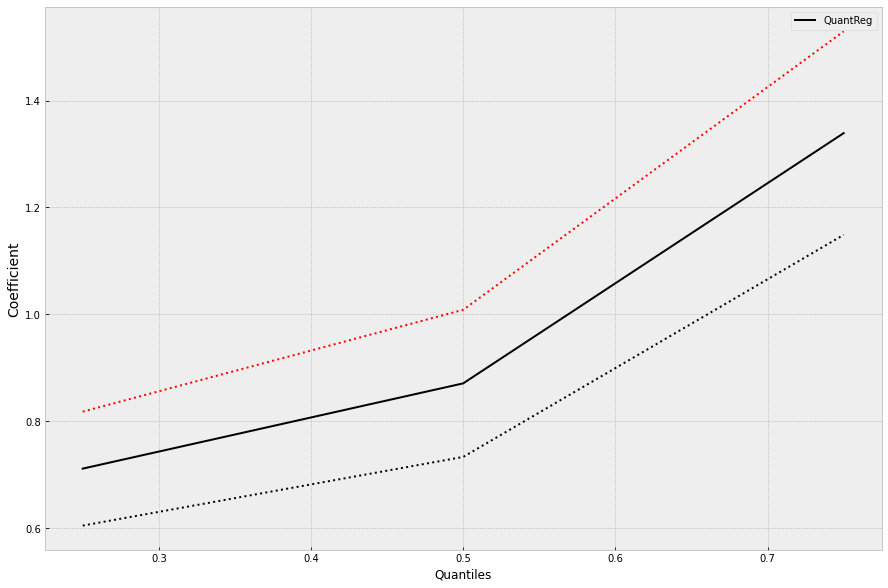

In [418]:
for i, colval in enumerate(data.drop(['price', 'zipcode','floors','condition'],1)):
  x = np.array(data[colval].values.reshape(-1,1))
  y = np.array(data['price'])

  # mse_calc function performs the quantile regression  
  def mse_calc():

    model1 = LinearRegression(fit_intercept=True, normalize=False)
    model1.fit(x,y)
  
    print(f"                                     | {colval} |\n")
    print("Mean squared error: {0:.2f}".format(np.sqrt(mean_squared_error(y, model1.predict(x)))))
    print('Variance score: {0:.2f}'.format(model1.score(x, y)))
    print("\n")

    # Quantile Regression
    # ----
    #
    mod = smf.quantreg('y ~ x ', data)
    res = mod.fit()

    # Models for other quantiles
    # ----
    #
    quantiles = np.arange(0.25,1,0.25) 
    models = []
    param = []

    for qt in quantiles: 
      res = mod.fit(q = qt )
      models.append(res)
      param.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

    # Lastly we make a dataframe of the same name, so we we can view our different models.
    # ----
    #
    param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'x_coef', 'ci_lb', 'ci_ub'])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~| QUANTILE COEFICIENTS |~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print(param, '\n')  
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print("                               -------------------                             \n")
    
    # Linear regression

    # Use OLS to do Linear Regression Prediction
    
    linreg = smf.ols('y ~ x', data).fit()
    ci = linreg.conf_int().loc['x'].tolist()

    lin = dict(intercept = linreg.params['Intercept'],
                  x_coef = linreg.params['x'],
                  ci_lb = ci[0],
                  ci_ub = ci[1])

    #Coefficients vs Quantiles
    n = param.shape[0]
    p1 = plt.plot(param['quantile'], param['x_coef'],color='black' ,label = 'QuantReg')
    p2 = plt.plot(param['quantile'], param['ci_ub'], linestyle = 'dotted', color='red')
    p3 = plt.plot(param['quantile'], param['ci_lb'], linestyle = 'dotted', color='black')
    plt.ylabel('Coefficient', fontsize = 14)
    plt.xlabel('Quantiles')
    plt.legend()
    plt.show()

  mse_calc()



**Conclusion:**

This columns were dropped because they had no linear relationship with our Target Variable


1.   Price
2.   Floors
3.   Condition

Zipcode was dropped because it gave an error that wasn't clear

A linear equation was used for Quantile Regression, from the model we can see that in each column,in the values in the higher Quantiles have larger coefficients meaning that the **higher** the values in this columns **strengthens** the relationship of that **Features** to our **Target Variable**


## Creating a Model that Predicts the House Sales Prices


### Tidy Dataset For Multiple Linear Regression

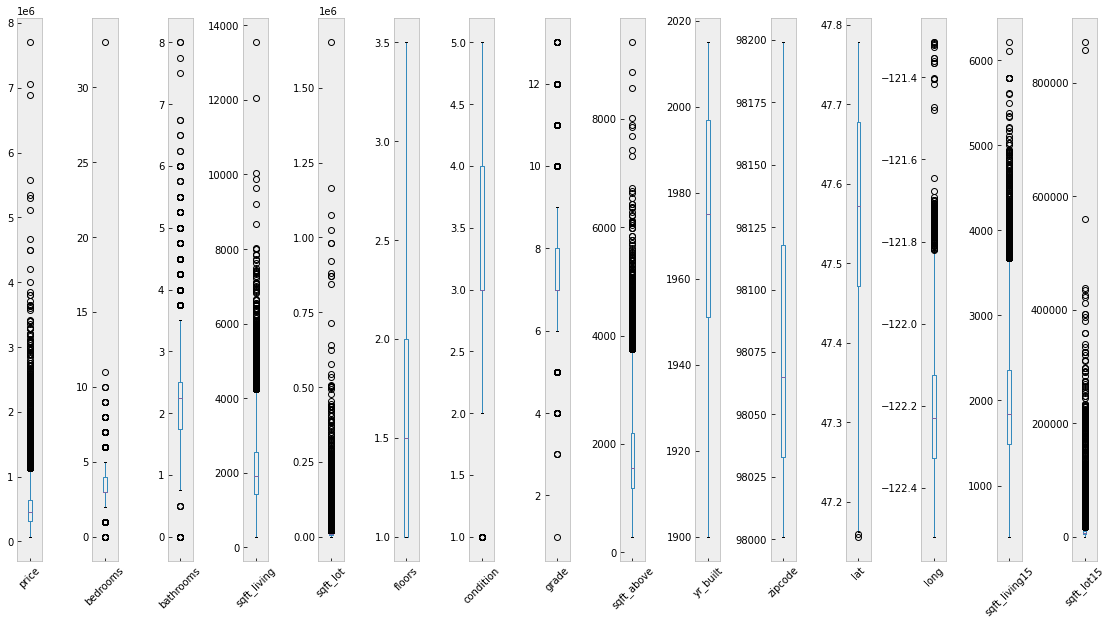

In [419]:
# Checking for Outliers
#
def outlier_visualiser(dataset_name, numeric_columns_list, width=15, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
outlier_visualiser(data, data.columns)

In [0]:
# Dropping Outliers

q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

iqr = q3 -q1

data_o = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]


In [421]:
print("The number of records before Outliers",data.shape)
print("The number of records after Outliers",data_o.shape)

The number of records before Outliers (21610, 15)
The number of records after Outliers (16606, 15)


In [0]:
# Drop the columns with no Linear Relation with Our Target
data_new = data_o.drop(['floors','condition'], 1)

### Multiple Linear Regression with PCA

In [0]:
# Split the data into features and labels
X = data_new.drop(['price','yr_built'],1).values
y = data_new['price'].values.reshape(-1,1)

In [0]:
#Standardize the Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=50)


In [0]:
#Apply PCA()
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [598]:
explained_ratio = pca.explained_variance_ratio_
explained_ratio

array([0.39695178, 0.18787537, 0.11575146, 0.08113378, 0.06101047,
       0.0415597 , 0.03625748, 0.02882357, 0.02713376, 0.01275234,
       0.0107503 ])

In [599]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make Predictions
y_pred = linreg.predict(X_test)

# Residuals
residuals = np.subtract(y_pred,y_test)
# Calculate RMSE
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("The RMSE is:",RMSE)
lin_score = linreg.score(X_test,y_test)
print("The Score for Linear Regression:",)

The RMSE is: 124152.62435498029
The Score for Linear Regression:


In [600]:
# The coefficients for our Linear Model
coef_dict_baseline = {}
for coef, feat in zip(linreg.coef_.reshape(-1,1),data_new.drop(['price','yr_built'],1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','coef']
coef_dict

lin_coef = dict( coef = coef_dict['coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(lin_coef)
df

coef       features
0   39624.851709       bedrooms
1  -53196.007214      bathrooms
2   53863.021179    sqft_living
3   65816.053076       sqft_lot
4   -1901.668791          grade
5  -16278.155606     sqft_above
6   42395.415795        zipcode
7   -7439.821780            lat
8   11919.135945           long
9   69103.417111  sqft_living15
10   2117.005196     sqft_lot15

**Residual Plots**

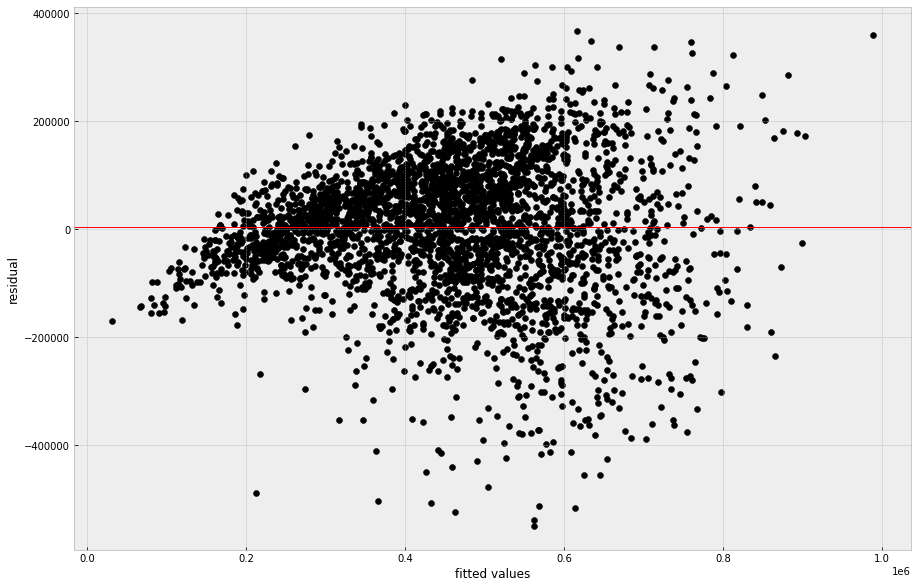

In [601]:
# Plotting the Residual Plot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**Heteroscedasticity**

In [602]:
# Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred.flatten(), residuals.flatten())

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


**Conclusion:**

The most residuals are near the mean 0 from residual plots and from the Heteroscedacity using the Bartlett's Test the Variance are Homogeneous

This means the the **difference** between the **predicted values** with the **actual values** is steady throughout our data

### Ridge Regression

We are using the Dataset that has and MutliCollinearity

In [0]:
# Drop columns with no linear relationship with our Target
data_var = data.drop(['floors','condition'],1)

In [0]:
#Feautures and Labels

X = data_var.drop('price',1).values
y = data_var['price'].values

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [0]:
# Use GridSearch to find the best value for alpha 
ridge = Ridge(normalize=True)
clf = GridSearchCV(ridge, param_grid={'alpha':np.logspace(-3,5,10)}, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 20)

In [607]:
#apply it our data
clf.fit(X_train,y_train)
print("The Best Parameter",clf.best_params_)
print("The RMSE",abs(clf.best_score_))

The Best Parameter {'alpha': 0.007742636826811269}
The RMSE 213374.5742721542


In [608]:
# Fit the Parameter to the Ridge Regression
ridge = Ridge(normalize=True, alpha=0.007742636826811269)
ridge.fit(X_train,y_train)
print("The Ridge score is:", ridge.score(X_test,y_test))
print("The RMSE is:",np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

The Ridge score is: 0.661355744133354
The RMSE is: 218334.35563931626


In [609]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','ridge_coef']
coef_dict

ridge_coef = dict( ridge_coef = coef_dict['ridge_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(ridge_coef)
df

ridge_coef       features
0   -41743.463793       bedrooms
1    55716.997548      bathrooms
2      167.975361    sqft_living
3        0.069491       sqft_lot
4   101896.143155          grade
5       17.496091     sqft_above
6    -3218.374630       yr_built
7     -488.248604        zipcode
8   544961.625340            lat
9  -250037.967456           long
10      35.641140  sqft_living15
11      -0.235087     sqft_lot15

### Lasso Regression

In [0]:
# Use GridSearch to get the best parameter  
lasso = Lasso(normalize=True)

parameters = parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
clf = GridSearchCV(lasso, param_grid=parameters, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 20)

In [611]:
# Check for best parameters
clf.fit(X_train,y_train)
print(clf.best_params_)
print(abs(clf.best_score_))

{'alpha': 1.9000000000000001}
213383.16436000858


In [612]:
# Apply the Parameters to Lasso
lasso = Lasso(normalize=True, alpha =1.9000000000000001)
lasso.fit(X_train,y_train)
print("The Lasso Score is:",lasso.score(X_test,y_test))
print("The RMSE score is:",np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))


The Lasso Score is: 0.6615803579222852
The RMSE score is: 218261.93592363122


In [613]:
# The Coefficients
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','lasso_coef']
coef_dict

ridge_coef = dict(lasso_coef = coef_dict['lasso_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(ridge_coef)
df

lasso_coef       features
0   -42674.985014       bedrooms
1    54067.062208      bathrooms
2      175.042605    sqft_living
3        0.043890       sqft_lot
4   103342.091351          grade
5       12.197219     sqft_above
6    -3230.037030       yr_built
7     -491.572776        zipcode
8   545093.920634            lat
9  -244542.550717           long
10      32.624934  sqft_living15
11      -0.208414     sqft_lot15

### ElasticNet Regression

In [0]:
# Get parameters for Elastic Net
elastic = ElasticNet(normalize=True)
clf = GridSearchCV(elastic, param_grid={'alpha':np.logspace(-3,5,10), 'l1_ratio':np.arange(0,1,0.1)}, scoring='neg_root_mean_squared_error',cv=20, refit=True)

In [615]:
# The best parameter and score
clf.fit(X_train,y_train)
print("The Best Parameters are:",clf.best_params_)
print("The RMSE is:",abs(clf.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980427933924067.9, tolerance: 218724629503.63547
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985049564883350.9, tolerance: 219774563511.38297
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986686325652683.6, tolerance: 220163291345.2023
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9873180945

The Best Parameters are: {'alpha': 0.001, 'l1_ratio': 0.9}
The RMSE is: 249758.26399400458


In [616]:
#Apply the parameters to Elastic 
elastic = ElasticNet(normalize=True, alpha=0.001, l1_ratio=0.9)
elastic.fit(X_train,y_train)
print("The Elastic Score:", elastic.score(X_test,y_test))
print("The RMSE is:", np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

The Elastic Score: 0.5172073651034879
The RMSE is: 260693.7024945741


In [617]:
# The Coefficients
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_.reshape(-1,1),data_var.drop('price',1).columns):
    coef_dict_baseline[feat] = coef

coef_dict = pd.DataFrame.from_dict(coef_dict_baseline,orient='index' )
coef_dict.reset_index(level=0 ,inplace= True)

coef_dict.columns = ['features','elastic_coef']
coef_dict

elastic_coef = dict(elastic_coef = coef_dict['elastic_coef'],
                 features = coef_dict['features'])

df = pd.DataFrame.from_dict(elastic_coef)
df

elastic_coef       features
0     9673.857761       bedrooms
1    39616.314866      bathrooms
2       55.231786    sqft_living
3        0.082664       sqft_lot
4    42210.096810          grade
5       44.329003     sqft_above
6     -646.524308       yr_built
7       37.416920        zipcode
8   255216.264744            lat
9   -91201.513064           long
10      53.937573  sqft_living15
11       0.044632     sqft_lot15

### Scores

In [0]:
models_score = dict(Linear_Score_PCA = lin_score,
                    Ridge_Score = ridge.score(X_test,y_test),
                    Lasso_Score = lasso.score(X_test,y_test),
                    ElasticNet_Score = elastic.score(X_test,y_test))
scores = pd.DataFrame.from_dict(models_score,orient='index')
scores.reset_index(level=0 ,inplace= True)

scores.columns = ['Models','Model_score']
scores

######  Conclusion


From the 4 Models we can see from the scoring table above that when we use PCA with Multiple Linear Regression the Accuracy it achieves **57.59% Accuracy**.
As PCA reduces Features it removes MultiCollinearity as well

The best scoring model is Ridge Model, it Improved slightly from the Multiple Linear Regression which is **66.15% Accuracy**

Elastic had the poorest score, **51.7% Accuracy**  this is might have caused by having few records, Elastic works best with large datasets

## 8. Challenging the solution

The Accuracy for the Linear Model can be Improved by not using PCA to remove Multicollinearity, look into other methods of removing MultiCollinearity

For the other 3 Models we can look for Data that has Strong MultiCollinearity.
**ElasticNet Regression** works better with large dataset thus we can exclude it from a small dataset

Improving the Accuracy of the models can be done by looking for Features with Strong Correlation with our **Target Variable** (Price)



## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?